In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [13]:
# https://pytorch.org/docs/stable/generated/torch.unsqueeze.html?highlight=unsqueeze#torch.unsqueeze
data = [1,2,3]
data1 = torch.unsqueeze(torch.FloatTensor(data), dim=0)
data1

tensor([[1., 2., 3.]])

In [14]:
data1 = torch.unsqueeze(torch.FloatTensor(data), dim=1)
data1

tensor([[1.],
        [2.],
        [3.]])

In [16]:
data1 = torch.unsqueeze(torch.FloatTensor(data), dim=-1)
data1

tensor([[1.],
        [2.],
        [3.]])

In [24]:
data = [[1,2],[3,4]]
data1 = torch.unsqueeze(torch.FloatTensor(data), dim=0)
data1

tensor([[[1., 2.],
         [3., 4.]]])

In [28]:
import numpy as np

In [29]:
np.array(data).shape

(2, 2)

In [25]:
data1.shape

torch.Size([1, 2, 2])

In [18]:
data1 = torch.unsqueeze(torch.FloatTensor(data), dim=1)
data1

tensor([[[1., 2.]],

        [[3., 4.]]])

In [20]:
data1.shape

torch.Size([2, 1, 2])

In [21]:
data1 = torch.unsqueeze(torch.FloatTensor(data), dim=2)
data1

tensor([[[1.],
         [2.]],

        [[3.],
         [4.]]])

In [22]:
data1.shape

torch.Size([2, 2, 1])

In [30]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1) #torch仅处理二维数据，使用unsqueeze函数
y = x.pow(2) + 0.2 * torch.rand(x.size())

In [31]:
x, y = Variable(x), Variable(y)

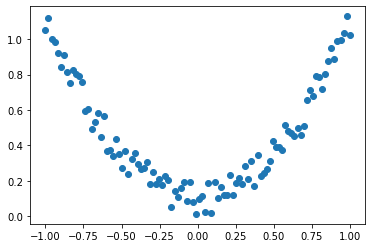

In [49]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [75]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(RegressionNet, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [76]:
net = RegressionNet(n_feature = 1, n_hidden = 10, n_output = 1)
net

RegressionNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

In [77]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.3)

In [78]:
loss_func = torch.nn.MSELoss()

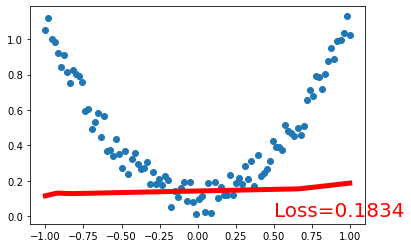

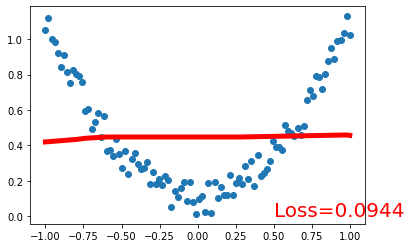

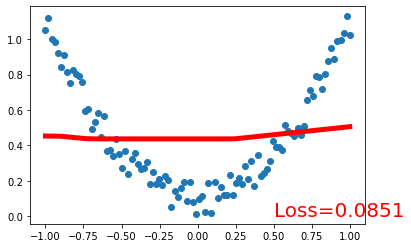

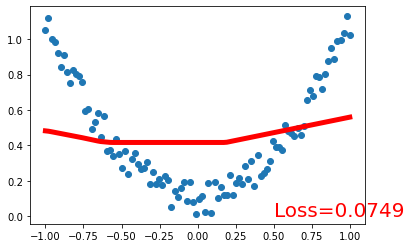

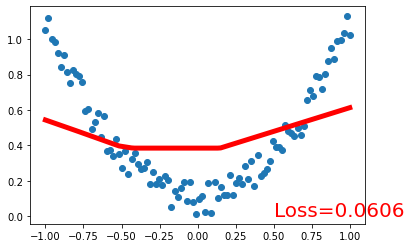

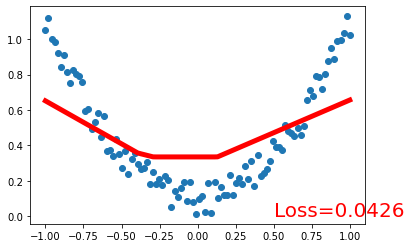

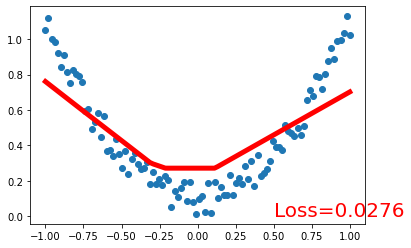

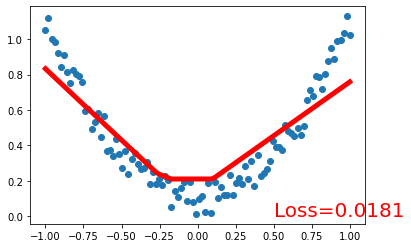

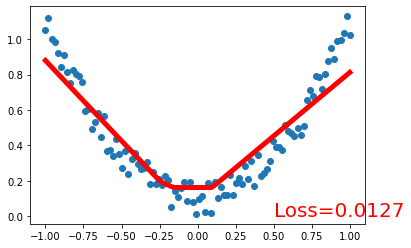

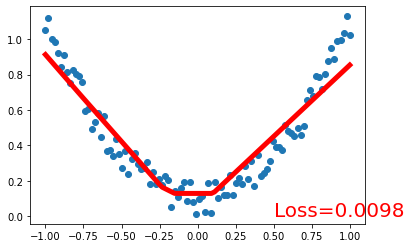

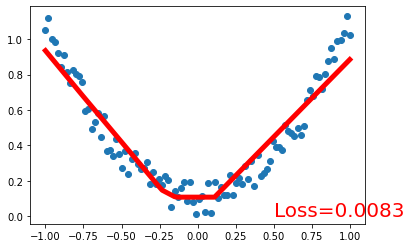

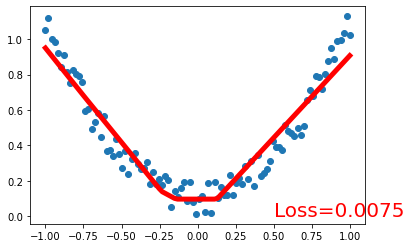

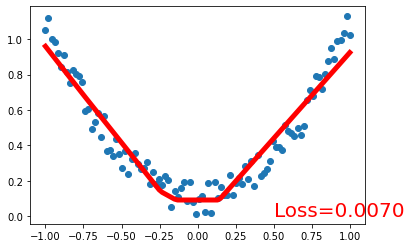

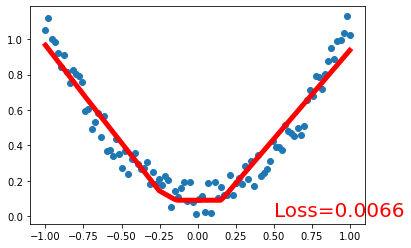

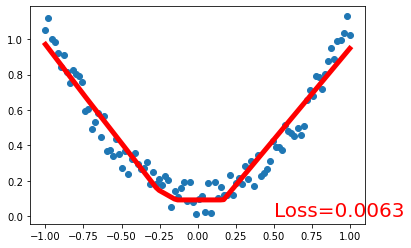

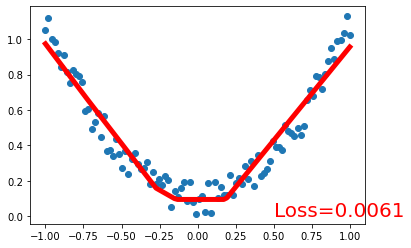

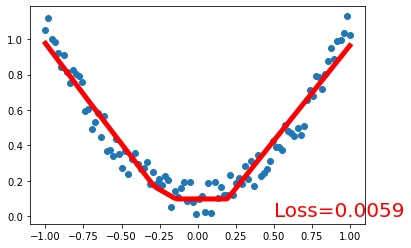

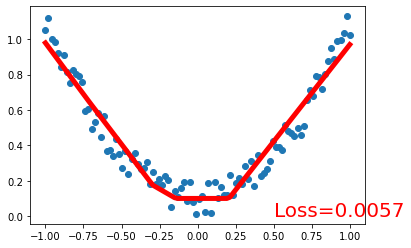

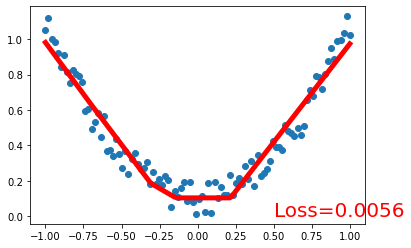

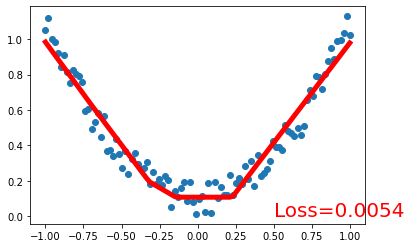

In [79]:
plt.ion()   # 画图
plt.show()

for t in range(200):
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad() # 清空上一步的残余的梯度
    loss.backward() # 误差反向传播, 计算参数更新值
    optimizer.step() # 将参数更新值施加到 net 的 parameters 上
    
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()   # 画图
plt.show()